### Initialization

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import seaborn as sns

%matplotlib inline

In [2]:
# Membuat koneksi ke database dan membuat kursor
try:
    conn = sqlite3.connect("olist.db")    
except Exception as e:
    print(e)
    
cursor = conn.cursor()

In [3]:
# Melihat table yang ada di database
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print('Available Tables:', *table_list, sep='\n- ')

Available Tables:
- ('olist_order_customer_dataset',)
- ('olist_order_dataset',)
- ('olist_order_reviews_dataset',)
- ('olist_order_payments_dataset',)
- ('olist_order_items_dataset',)
- ('olist_products_dataset',)
- ('olist_sellers_dataset',)
- ('olist_geolocation_dataset',)
- ('product_category_name_translation',)


In [4]:
# Assign tabel order customer kedalam variabel dan melihat datanya
order_customer = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', conn, index_col='index')
order_customer.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [5]:
# Assign tabel order kedalam variabel dan melihat datanya
order = pd.read_sql_query('SELECT * FROM olist_order_dataset', conn, index_col='index')
order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [6]:
# Assign tabel review kedalam variabel dan melihat datanya
order_reviews = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', conn, index_col='index')
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24


In [7]:
# Assign tabel payment kedalam variabel dan melihat datanya
order_payments = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', conn, index_col='index')
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
index,,,,,
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [8]:
# Assign tabel order items kedalam variabel dan melihat datanya
order_items = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', conn, index_col='index')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Assign tabel product kedalam variabel, membetulkan typo dan melihat datanya
products = pd.read_sql_query('SELECT * FROM olist_products_dataset', conn, index_col='index')
products.rename(columns={'product_name_lenght':'product_name_length', 
                         'product_description_lenght':'product_description_length'}, inplace=True)
products.head(3)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [10]:
# Assign tabel sellers kedalam variabel dan melihat datanya
sellers = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', conn, index_col='index')
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
index,,,,
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [11]:
# Assign tabel translation kedalam variabel dan melihat datanya
translation = pd.read_sql_query('SELECT * FROM product_category_name_translation', conn, index_col='index')
translation.head()

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# Menutup koneksi ke database
conn.close()

### Master Data

#### Create Master Data Table

In [13]:
# Memotong tabel order dan menyisakan kolom yang diperlukan
order_trimmed = order[['order_id','customer_id', 'order_status', 'order_purchase_timestamp']]
order_trimmed.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp
index,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49


In [14]:
# Memotong tabel order items dan menyisakan kolom yang diperlukan
order_items_trimmed = order_items[['order_id',  'product_id', 'seller_id']]
order_items_trimmed.head(3)

,order_id,product_id,seller_id
index,,,
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d


In [15]:
# Memotong tabel products dan menyisakan kolom yang diperlukan
products_trimmed = products[['product_id', 'product_category_name']]
products_trimmed.head(3)

,product_id,product_category_name
index,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer


In [16]:
# Memotong tabel order payments dan menyisakan kolom yang diperlukan
order_payments_trimmed = order_payments[['order_id', 'payment_value']]
order_payments_trimmed.head(3)

,order_id,payment_value
index,,
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71


In [17]:
# Memotong tabel order customer dan menyisakan kolom yang diperlukan
order_customer_trimmed = order_customer[['customer_id', 'customer_state']]
order_customer_trimmed.head(3)

,customer_id,customer_state
index,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP


In [18]:
# Memotong tabel sellers dan menyisakan kolom yang diperlukan
sellers_trimmed = sellers[['seller_id', 'seller_state']]
sellers_trimmed.head(3)

,seller_id,seller_state
index,,
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ


In [19]:
# Menggabungkan seluruh tabel yang sudah dipotong kedalam sebuah master tabel
master_1 = pd.merge(order_trimmed, order_items_trimmed, on='order_id')
master_1 = pd.merge(master_1, products_trimmed, on='product_id')
master_1 = pd.merge(master_1, order_payments_trimmed, on='order_id')
master_1 = pd.merge(master_1, order_customer_trimmed, on='customer_id')
master_1 = pd.merge(master_1, sellers_trimmed, on='seller_id')
master_1 = master_1.drop('product_id', axis=1)

In [20]:
# Translate kategori produk kedalam bahasa inggris
translation_dict = dict(zip(translation['product_category_name'], translation['product_category_name_english']))
master_1['product_category_name'] = master_1['product_category_name'].map(translation_dict)

# Tampilkan master data
master_1.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,seller_id,product_category_name,payment_value,customer_state,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,18.12,SP,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,2.00,SP,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,18.59,SP,SP


##### Menghandle Missing Values

In [21]:
def missing_val_table(df):
    """Create table to find count of the missing values and its proportion within dataframe columns"""
    missing = df.isna().sum()
    table = pd.DataFrame({'Null Count':missing, 
                          "Null Proportion":missing/len(df)}).sort_values(by='Null Count', ascending=False)
    return table

In [22]:
# Cek informasi dari master tabel
master_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  117601 non-null  object 
 1   customer_id               117601 non-null  object 
 2   order_status              117601 non-null  object 
 3   order_purchase_timestamp  117601 non-null  object 
 4   seller_id                 117601 non-null  object 
 5   product_category_name     115878 non-null  object 
 6   payment_value             117601 non-null  float64
 7   customer_state            117601 non-null  object 
 8   seller_state              117601 non-null  object 
dtypes: float64(1), object(8)
memory usage: 9.0+ MB


In [23]:
# Menampilkan jumlah Null dan proporsi null pada setiap kolom
missing_val_table(master_1)

,Null Count,Null Proportion
product_category_name,1723,0.014651
order_id,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000
seller_id,0,0.000000
payment_value,0,0.000000
customer_state,0,0.000000
seller_state,0,0.000000


In [24]:
# Menghapus baris dengan null values. Karena tidak mungkin mendapatkan 
# kategori produk yang hilang. Pertimbangan lain yaitu proporsi null value 
# cukup rendah, 1,5%.
master_1.dropna(inplace=True)

In [25]:
# Cek kembali apakah masih ada missing value
missing_val_table(master_1)

,Null Count,Null Proportion
order_id,0,0.0
customer_id,0,0.0
order_status,0,0.0
order_purchase_timestamp,0,0.0
seller_id,0,0.0
product_category_name,0,0.0
payment_value,0,0.0
customer_state,0,0.0
seller_state,0,0.0


##### Mengubah Tipe Data

In [26]:
# Mengubah tipe data tanggal kedalam bentuk datetime
master_1['order_purchase_timestamp'] = pd.to_datetime(master_1['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

Pembuatan tabel master data selesai

-------------------------------------------------------------------------

### Topic 1

#### Membuat kolom 'Month'

In [27]:
master_1['month'] = master_1['order_purchase_timestamp'].dt.month

##### Memfilter order_status

In [28]:
T1_data = master_1

In [29]:
# Melihat jenis order status dan jumlahnya
T1_data['order_status'].value_counts()

delivered      113384
shipped          1214
canceled          549
processing        362
invoiced          359
unavailable         7
approved            3
Name: order_status, dtype: int64

In [30]:
# Memfilter order status menyisakan order dengan status 'delivered' dan 'shipped' saja
mask = (T1_data['order_status'] == 'delivered') | (T1_data['order_status'] == 'shipped')

T1_data = T1_data[mask]

In [31]:
# Cek kembali jenis order_status yang ada
T1_data['order_status'].value_counts()

delivered    113384
shipped        1214
Name: order_status, dtype: int64

##### Filter kategori produk

In [32]:
# Hanya pilih produk dengan kategori yang diinginkan perusahaan
selected_cat = ['auto', 'baby','drinks','electronics','food','housewares','music','stationery','toys']

In [33]:
T1_data = T1_data[T1_data['product_category_name'].isin(selected_cat)]

##### Pivot table and graphing

In [37]:
# Membuat pivot tabel dengan kolom kategori produk dan baris bulan
# Nilai yang ditampilkan adalah frekuensi transaksi (berapa kali transaksi)
piv_topic_1_count = T1_data.pivot_table(values='payment_value', 
                         index=['month'], 
                         columns=['product_category_name'], 
                         aggfunc='count', 
                         fill_value=0)

In [38]:
# Menampilkan pivot tabel
piv_topic_1_count

product_category_name,auto,baby,drinks,electronics,food,housewares,music,stationery,toys
month,,,,,,,,,
1,302,272,57,367,21,409,3,429,210
2,413,207,32,353,47,494,3,188,218
3,431,279,26,301,58,646,3,229,350
4,460,301,62,267,49,674,7,199,322
5,445,365,48,306,47,961,5,205,428
6,428,318,35,235,26,964,8,215,362
7,472,368,19,261,71,879,4,274,382
8,554,352,29,176,134,958,6,253,352
9,111,178,6,70,17,264,0,76,306


Text(0, 0.5, 'Frekuensi transaksi')

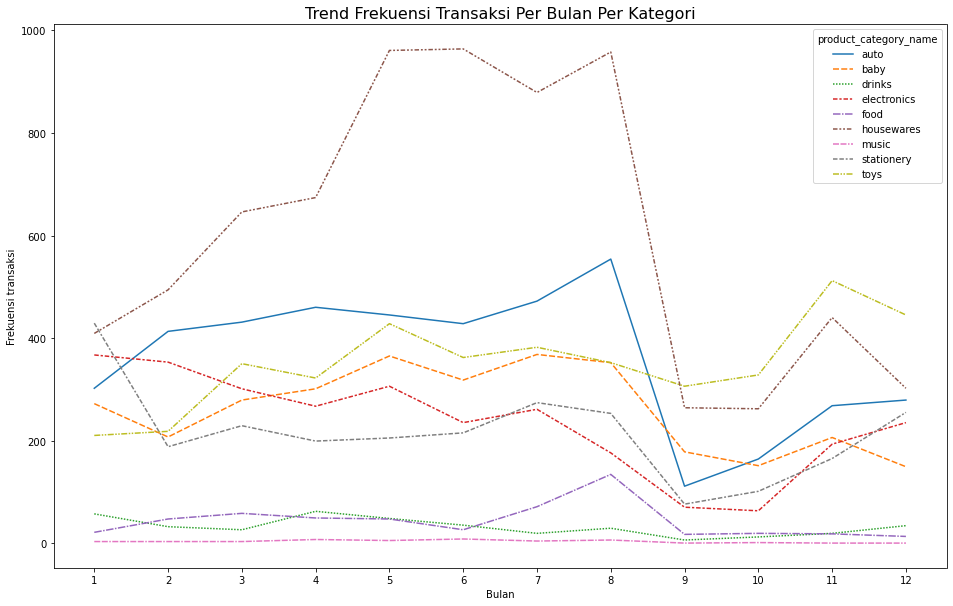

In [39]:
# Membuat grafik dari pivot tabel diatas
plt.figure(figsize=(16,10))
sns.lineplot(data=piv_topic_1_count)
plt.xticks(piv_topic_1_count.index)
plt.title('Trend Frekuensi Transaksi Per Bulan Per Kategori', size=16)
plt.xlabel('Bulan')
plt.ylabel('Frekuensi transaksi')

In [40]:
# Menampilkan urutan kategori produk dengan jumlah transaksi $ terbesar 
T1_data.groupby(['product_category_name']).sum()['payment_value'].sort_values(ascending=False)

product_category_name
housewares     1080114.87
auto            840055.48
toys            606917.72
baby            531835.72
stationery      312336.45
electronics     248151.03
drinks           70644.87
food             45961.34
music             6901.43
Name: payment_value, dtype: float64

Topic 1 selesai

-----------------------------------------

### Topic 2

In [41]:
# Memfilter kolom dari master tabel dan mengassignkannya ke variabel baru
T2_data = master_1[['order_id', 'product_category_name', 'payment_value', 'customer_state', 'seller_state']]
T2_data.head(3)

,order_id,product_category_name,payment_value,customer_state,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,18.12,SP,SP
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,2.00,SP,SP
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,18.59,SP,SP


In [42]:
# Membuat series yang berisikan jumlah frekuensi pembelian dan nilai $ pembelian berdasarkan State
buy_counts = T2_data.groupby(['customer_state']).count()['order_id']
buy_value = T2_data.groupby(['customer_state']).sum()['payment_value']

# Membuat dataframe dari 2 series diatas dan mengubah nama kolom
buys = pd.DataFrame([buy_counts, buy_value]).T
buys.rename(columns={'order_id':'buy_counts', 'payment_value':'buy_value'}, inplace=True)

In [43]:
# Membuat series yang berisikan jumlah frekuensi penjualan dan nilai $ penjualan berdasarkan State
sell_counts = T2_data.groupby(['seller_state']).count()['order_id']
sell_value = T2_data.groupby(['seller_state']).sum()['payment_value']

# Membuat dataframe dari 2 series diatas dan mengubah nama kolom
sells = pd.DataFrame([sell_counts, sell_value]).T
sells.rename(columns={'order_id':'sell_counts', 'payment_value':'sell_value'}, inplace=True)

In [44]:
# Menggabungkan 2 dataframe yang dibuat
state_trades = buys.join(sells)

# Membuat kolom rata-rata untuk pembelian dan penjualan
state_trades['average_buy_value'] = state_trades['buy_value']/state_trades['buy_counts']
state_trades['average_sell_value'] = state_trades['sell_value']/state_trades['sell_counts']

# Data yang kosong (null) diisi dengan angka 0
state_trades.fillna(0, inplace=True)

In [45]:
# Menampilkan tabel penjualan dan pembelian berdasarkan State
state_trades

,buy_counts,buy_value,sell_counts,sell_value,average_buy_value,average_sell_value
customer_state,,,,,,
AC,93.0,24857.52,1.0,299.84,267.285161,299.840000
AL,454.0,110593.98,0.0,0.00,243.599075,0.000000
AM,169.0,33475.98,3.0,1258.80,198.082722,419.600000
AP,84.0,21642.70,0.0,0.00,257.651190,0.000000
BA,3974.0,786125.16,698.0,367899.46,197.817101,527.076590
CE,1533.0,337194.08,103.0,25849.77,219.956999,250.968641
DF,2440.0,429150.39,936.0,135759.76,175.881307,145.042479
ES,2319.0,403827.27,379.0,77334.01,174.138538,204.047520
GO,2375.0,503539.86,539.0,110307.53,212.016783,204.652189


In [57]:
# Menampilkan 5 States dengan jumlah $ transaksi pembelian terbesar (total)
state_trades.sort_values(by='buy_counts', ascending=False).head(5)

,buy_counts,buy_value,sell_counts,sell_value,average_buy_value,average_sell_value
customer_state,,,,,,
SP,48838.0,7500184.48,82601.0,13185924.21,153.572720,159.633954
RJ,15089.0,2736014.92,4930.0,1082376.85,181.325132,219.549057
MG,13451.0,2301409.15,9046.0,1538235.56,171.095766,170.045939
RS,6384.0,1127281.12,2233.0,552734.44,176.579123,247.529978
PR,5882.0,1053724.99,8949.0,1828583.10,179.143997,204.333791


In [58]:
# Menampilkan 5 States dengan jumlah $ transaksi penjualan terbesar (total)
state_trades.sort_values(by='sell_counts', ascending=False).head(5)

,buy_counts,buy_value,sell_counts,sell_value,average_buy_value,average_sell_value
customer_state,,,,,,
SP,48838.0,7500184.48,82601.0,13185924.21,153.572720,159.633954
MG,13451.0,2301409.15,9046.0,1538235.56,171.095766,170.045939
PR,5882.0,1053724.99,8949.0,1828583.10,179.143997,204.333791
RJ,15089.0,2736014.92,4930.0,1082376.85,181.325132,219.549057
SC,4237.0,777467.95,4238.0,884663.89,183.494914,208.745609


In [48]:
# Menampilkan 5 States dengan jumlah $ per transaksi pembelian terbesar
state_trades.sort_values(by='average_buy_value', ascending=False).head(5)

,buy_counts,buy_value,sell_counts,sell_value,average_buy_value,average_sell_value
customer_state,,,,,,
PB,629.0,177666.93,41.0,20096.84,282.459348,490.166829
AC,93.0,24857.52,1.0,299.84,267.285161,299.840000
AP,84.0,21642.70,0.0,0.00,257.651190,0.000000
AL,454.0,110593.98,0.0,0.00,243.599075,0.000000
RR,50.0,12160.39,0.0,0.00,243.207800,0.000000


In [49]:
# Menampilkan 5 States dengan jumlah $ per transaksi penjualan terbesar
state_trades.sort_values(by='average_sell_value', ascending=False).head(5)

,buy_counts,buy_value,sell_counts,sell_value,average_buy_value,average_sell_value
customer_state,,,,,,
BA,3974.0,786125.16,698.0,367899.46,197.817101,527.076590
PB,629.0,177666.93,41.0,20096.84,282.459348,490.166829
AM,169.0,33475.98,3.0,1258.80,198.082722,419.600000
RO,280.0,64967.06,14.0,5553.27,232.025214,396.662143
AC,93.0,24857.52,1.0,299.84,267.285161,299.840000


Topic 2 selesai

-----------------------------

### Topic 3

In [50]:
# Filter data dari master tabel dengan menyisakan kolom yang akan digunakan
T3_data = master_1[['order_id', 'order_status', 'product_category_name']]

# Gabungkan dengan data order reviews yang juga telah difilter
T3_data = pd.merge(T3_data, order_reviews[['order_id',
                                           'review_score', 
                                           'review_comment_title', 
                                           'review_comment_message']], on='order_id')

In [51]:
# Menampilkan hasil penggabungan data
T3_data.head(3)

,order_id,order_status,product_category_name,review_score,review_comment_title,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre..."


In [52]:
# Melihat komposisi dan tipe data dari tabel
T3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   order_id                115609 non-null  object
 1   order_status            115609 non-null  object
 2   product_category_name   115609 non-null  object
 3   review_score            115609 non-null  int64 
 4   review_comment_title    13801 non-null   object
 5   review_comment_message  48906 non-null   object
dtypes: int64(1), object(5)
memory usage: 6.2+ MB


In [53]:
def review_completeness(table):
    """Check if content in review_comment_title and review_comment_message columns are
    filled and return the percentage of completeness
    """
    
    if table['review_comment_title']==None and table['review_comment_message']==None:
        return 0
    elif table['review_comment_title']!=None and table['review_comment_message']==None:
        return 0.5
    elif table['review_comment_title']==None and table['review_comment_message']!=None:
        return 0.5
    else:
        return 1

In [54]:
# Mengaplikasikan fungsi review_completeness kepada tabel
T3_data['review_completeness'] = T3_data.apply(review_completeness, axis=1)

In [55]:
# Menampilkan tabel setelah pengaplikasian fungsi
T3_data.head(3)

,order_id,order_status,product_category_name,review_score,review_comment_title,review_comment_message,review_completeness
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre...",0.5
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre...",0.5
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,housewares,4,None,"Não testei o produto ainda, mas ele veio corre...",0.5


In [56]:
# Menampilkan 5 kategori produk dengan review completeness terendah
T3_data.groupby(['product_category_name']).mean().sort_values(by='review_completeness').head(5)

,review_score,review_completeness
product_category_name,,
fashion_sport,4.258065,0.112903
fashion_childrens_clothes,4.500000,0.125000
dvds_blu_ray,4.114286,0.164286
tablets_printing_image,4.117647,0.176471
agro_industry_and_commerce,4.150794,0.178571


Topic 3 selesai

----------------------------